In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pearson_util 
import descartes
import pygeoj
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
import statsmodels.api as sm

In [2]:
gdf_dw = gpd.read_file('C:/Users/seanp/python/NUTS_RG_60M_2016_3035_LEVL_3.geojson')
gdf_dw.iloc[1318:1522]


,id,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,FID,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE,geometry
1318,RO414,3,4,Olt,RO,RO414,RO414,Olt,3,3,"POLYGON ((5500624.645 2481498.725, 5496185.887..."
1319,RO415,3,2,Vâlcea,RO,RO415,RO415,Vâlcea,3,3,"POLYGON ((5457799.893 2527102.235, 5447340.912..."
1320,UKH25,3,4,Central Bedfordshire,UK,UKH25,UKH25,Central Bedfordshire,3,1,"POLYGON ((3627278.940 3267434.368, 3608276.298..."
1321,UKH31,1,4,Southend-on-Sea,UK,UKH31,UKH31,Southend-on-Sea,3,1,"POLYGON ((3681173.766 3201641.834, 3684013.709..."
1322,UKH32,1,4,Thurrock,UK,UKH32,UKH32,Thurrock,3,1,"POLYGON ((3664855.621 3200561.199, 3654719.164..."
...,...,...,...,...,...,...,...,...,...,...,...
1517,UKH16,1,4,North and West Norfolk,UK,UKH16,UKH16,North and West Norfolk,3,3,"POLYGON ((3760200.001 3324800.736, 3715302.262..."
1518,UKH17,2,4,Breckland and South Norfolk,UK,UKH17,UKH17,Breckland and South Norfolk,3,3,"POLYGON ((3754275.042 3301188.055, 3706277.604..."
1519,UKH21,2,4,Luton,UK,UKH21,UKH21,Luton,3,1,"POLYGON ((3608276.298 3251322.689, 3605470.224..."
1520,UKH23,2,4,Hertfordshire,UK,UKH23,UKH23,Hertfordshire,3,1,"POLYGON ((3641428.795 3257056.214, 3631036.624..."


<AxesSubplot:>

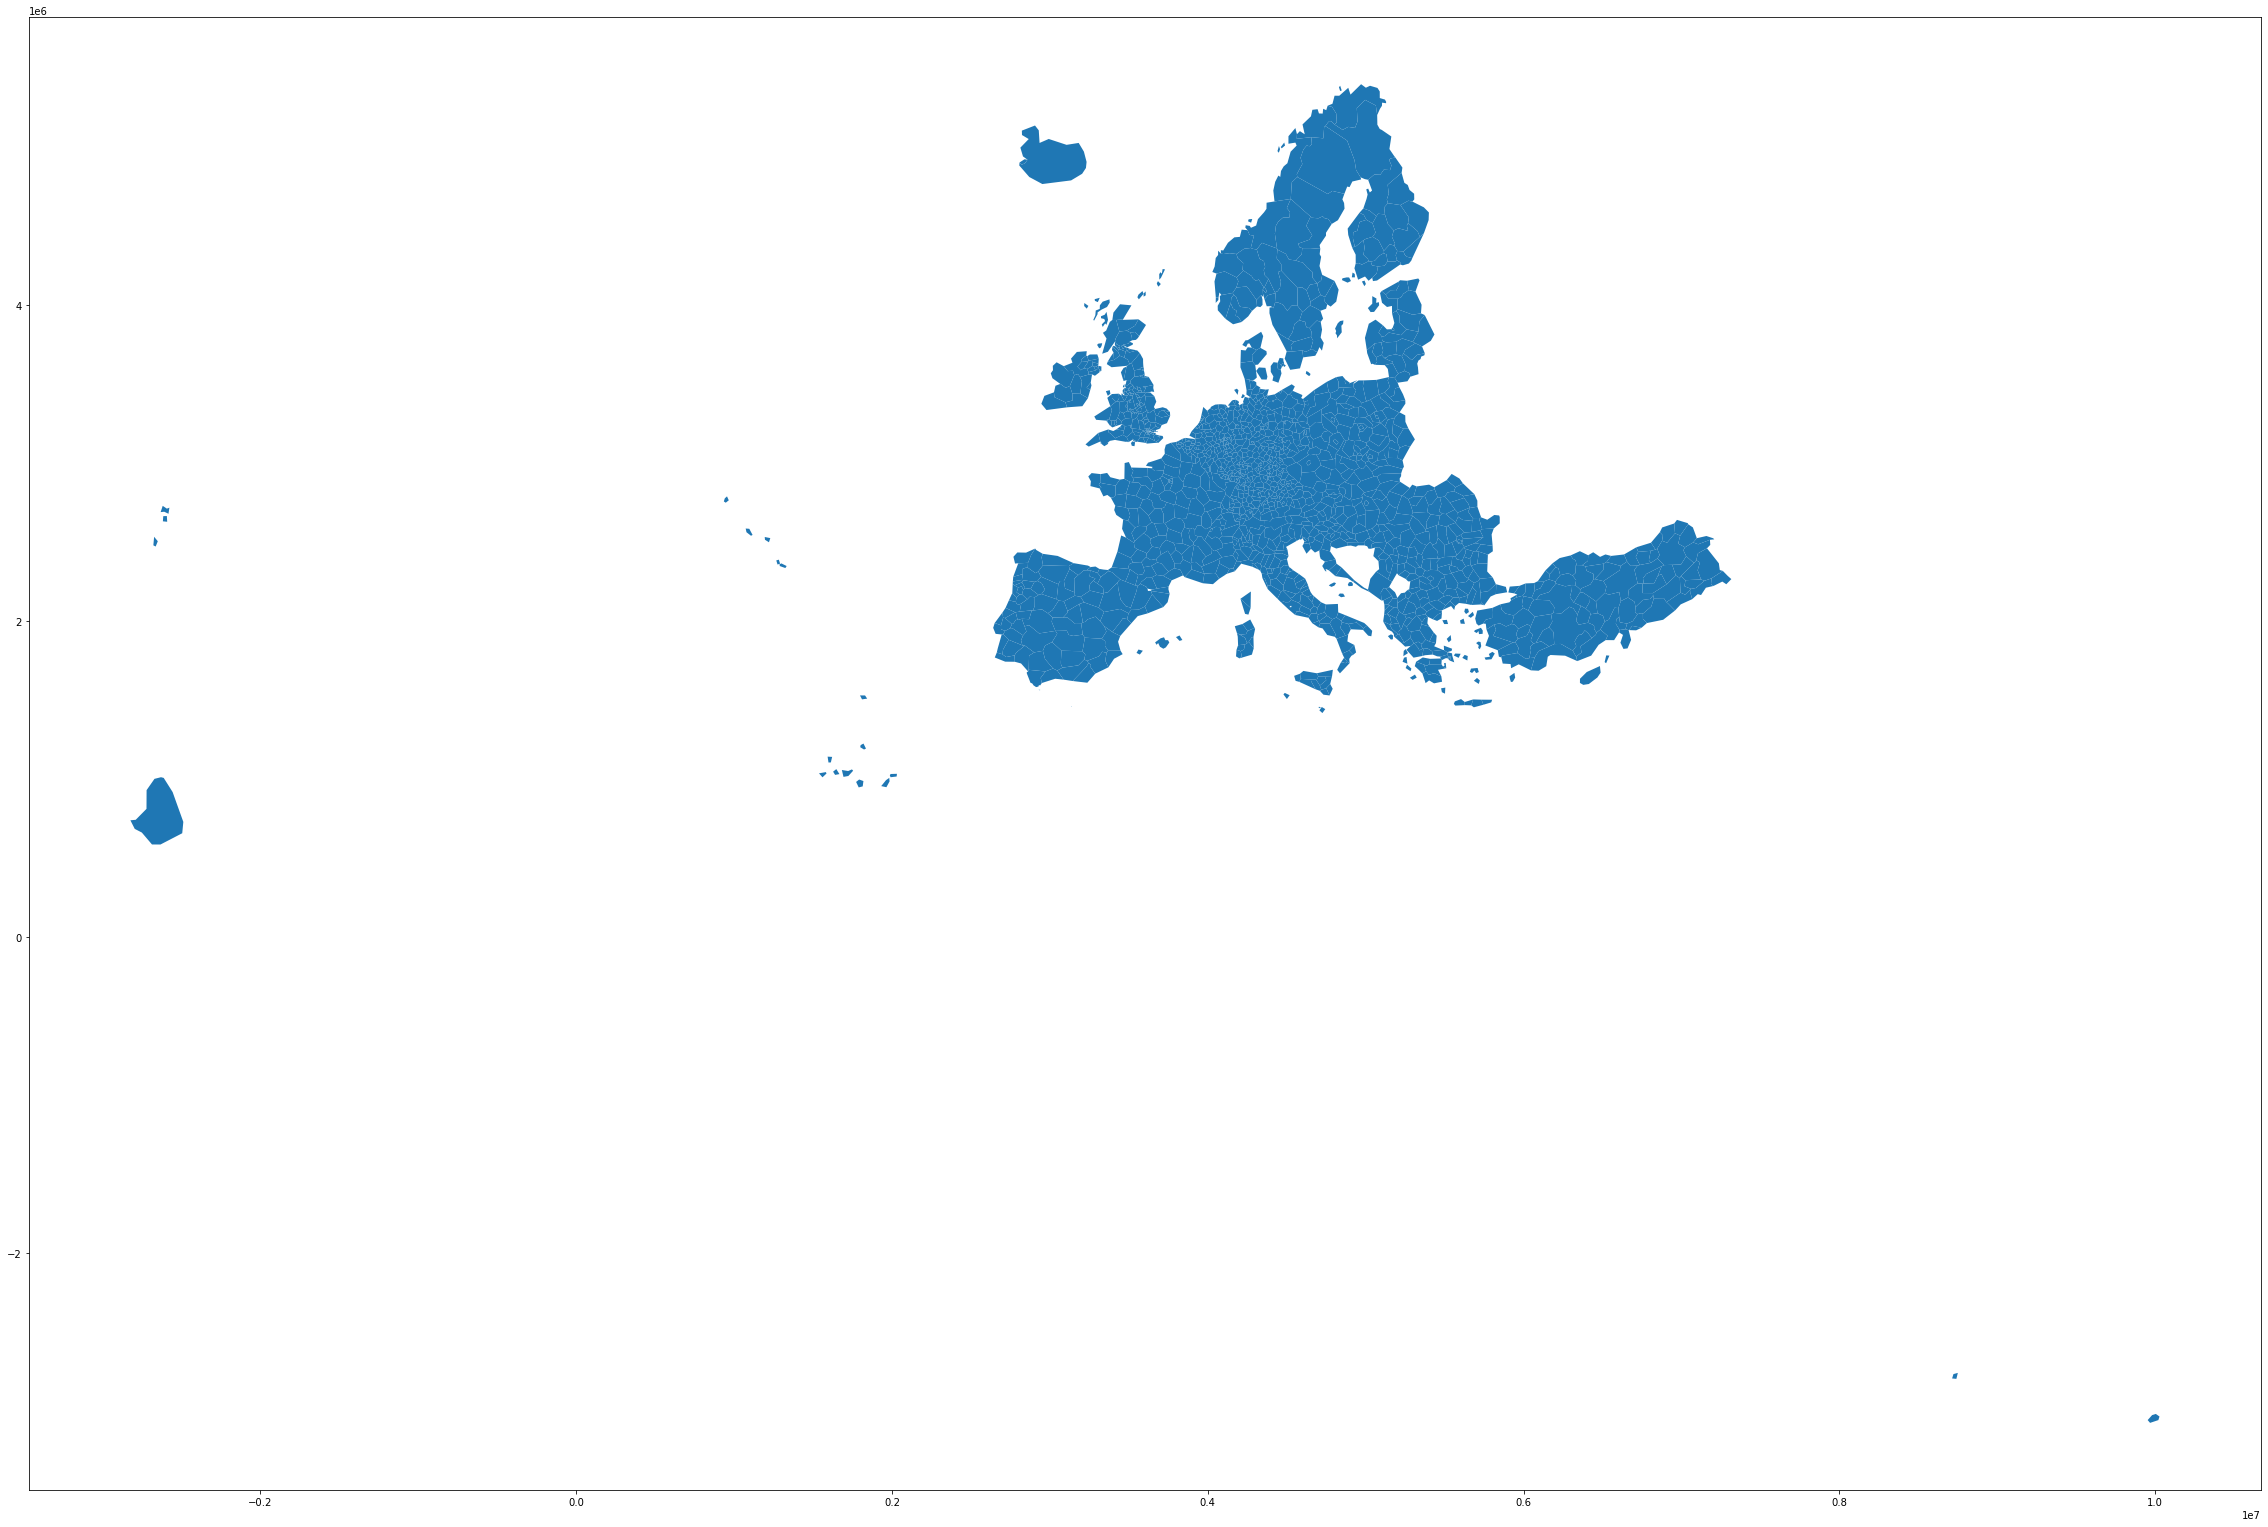

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (40,40))
gdf_dw.plot(ax=ax)

In [4]:
gdf = gpd.read_file('https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_60M_2016_3035_LEVL_3.geojson')

# Creating dataframes of average national annual road freight transport by regions (NUTS 3) and by group of goods (1 000 t)

In [5]:
#National annual road freight transport by regions of unloading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_ru3g)
df_unloading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_ru3g.tsv.gz',['subsector', 'unit', 'region'])

In [6]:
df_unloading_total = df_unloading.loc['TOTAL']

In [7]:
df_unloading_total = df_unloading_total.droplevel(0)

In [8]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_unloading_nuts3 = df_unloading_total.reindex(gdf.set_index('id').index)

In [9]:
#filters the countries that have no data
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [10]:
#National annual road freight transport by regions of loading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_rl3g
df_loading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_rl3g.tsv.gz',['subsector', 'unit', 'region'])

In [11]:
df_loading_total = df_loading.loc['TOTAL']

In [12]:
df_loading_total = df_loading_total.droplevel(0)

In [13]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_loading_nuts3 = df_loading_total.reindex(gdf.set_index('id').index)

In [14]:
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [15]:
df_loading_nuts3.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
CZ052,31164.0,23410.0,22302.0,22533.0,20556.0,16265.0,15133.0,14044.0,17536.0,12320.0,16522.0,17859.0
CZ053,27127.0,20301.0,20399.0,21064.0,19896.0,16948.0,15222.0,12602.0,14166.0,14423.0,16343.0,20090.0
CZ063,22196.0,26155.0,18682.0,20785.0,19078.0,15516.0,12487.0,9854.0,13296.0,14551.0,18543.0,20061.0
CZ064,49041.0,47453.0,43448.0,38848.0,40457.0,35683.0,29350.0,25806.0,26051.0,27880.0,31335.0,40006.0
CZ071,37656.0,34631.0,29204.0,26120.0,25596.0,26760.0,18776.0,23872.0,21159.0,19474.0,25554.0,25133.0


In [16]:
#Concatinates df --> takes 2 df and joins them together
df_average_transport_total = pd.concat((df_unloading_nuts3, df_loading_nuts3))

In [17]:
#takes lines with same index and calculates mean of them
df_average_transport_total = df_average_transport_total.groupby(df_average_transport_total.index).mean()

In [18]:
#sets the index 'country' and takes it from the cntr_code column of the gdf
df_average_transport_total = df_average_transport_total.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)

In [19]:
df_average_transport_total.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,3002.0,3325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,5311.5,3286.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,4799.5,2361.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,4986.5,3731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,4350.5,4223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Compacted

In [20]:
#unloading
df_unloading_GT01 = df_unloading.loc['GT01']
df_unloading_GT01 = df_unloading_GT01.droplevel(0)
df_unloading_GT01_nuts3 = df_unloading_GT01.reindex(gdf.set_index('id').index)
#loading
df_loading_GT01 = df_loading.loc['GT01']
df_loading_GT01 = df_loading_GT01.droplevel(0)
df_loading_GT01_nuts3 = df_loading_GT01.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT01 = pd.concat((df_unloading_GT01_nuts3, df_loading_GT01_nuts3))
df_average_transport_GT01 = df_average_transport_GT01.groupby(df_average_transport_GT01.index).mean()
df_average_transport_GT01 = df_average_transport_GT01.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT01 = df_average_transport_GT01.div(df_average_transport_total)
df_transport_share_GT01.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.147568,0.065865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,0.040102,0.067701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,0.030420,0.016727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.150607,0.081211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.092058,0.085958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#unloading
df_unloading_GT02 = df_unloading.loc['GT02']
df_unloading_GT02 = df_unloading_GT02.droplevel(0)
df_unloading_GT02_nuts3 = df_unloading_GT02.reindex(gdf.set_index('id').index)
#loading
df_loading_GT02 = df_loading.loc['GT02']
df_loading_GT02 = df_loading_GT02.droplevel(0)
df_loading_GT02_nuts3 = df_loading_GT02.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT02 = pd.concat((df_unloading_GT02_nuts3, df_loading_GT02_nuts3))
df_average_transport_GT02 = df_average_transport_GT02.groupby(df_average_transport_GT02.index).mean()
df_average_transport_GT02 = df_average_transport_GT02.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT02 = df_average_transport_GT02.div(df_average_transport_total)
df_transport_share_GT02.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.013824,0.006316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,NaN,0.010650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.002607,0.006433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.030341,0.002842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Multiply shares of transported good types with transportdistance and amount of these good types = amount of specific good types transported for specific distance in each NUTS 3 region

In [22]:
df_transportdistance = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_dctg.tsv.gz',['Type_of_carriage', 'Distance','Subsector', 'Unit', 'Country'])

In [23]:
df_transportdistance

2019       2018   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1904.0     2007.0   
                                           BE          4249.0     3975.0   
                                           BG          1581.0     1850.0   
                                           CH          1355.0     1009.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        444460.0   475457.0   
                                           SI         54439.0    50164.0   
                                           SK        142892.0   128855.0   
                                           UK       1453669.0  1408269.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2017       2016   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2275.0     2138.0   
                                           BE          3238.0     3754.0   
                                           BG          1921.0     1767.0   
                                           CH           949.0     1027.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        449691.0   426715.0   
                                           SI         54027.0    46096.0   
                                           SK        128789.0   105812.0   
                                           UK       1402948.0  1435273.0   
                           UNK       THS_T UK             NaN        1.0   

                                                        2015       2014   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2131.0     1759.0   
                                           BE          4607.0     2015.0   
                                           BG          2249.0     2017.0   
                                           CH          1447.0     1117.0   
                                           CY             1.0        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        416940.0   375707.0   
                                           SI         43530.0    50698.0   
                                           SK        100698.0   101173.0   
                                           UK       1450651.0  1329869.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2013       2012   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1689.0     2037.0   
                                           BE          1766.0     2039.0   
                                           BG          1858.0     1479.0   
                                           CH          1412.0      825.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        276659.0   290008.0   
                                           SI         42608.0    40847.0   
                                           SK         92402.0    94709.0   
                                           UK       1328683.0  1445128.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2011       2010   \
Type_of_carriage Distanc

In [24]:
#distance is not selected yet. 'TOT' is all distance classes
df_transportdistance = df_transportdistance.loc[('TOT', 'TOTAL', 'GT01')]
df_transportdistance = df_transportdistance.droplevel(0)
df_transportdistance

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Country,,,,,,,,,,,,
AT,20123.0,20403.0,21207.0,20101.0,18420.0,17585.0,16393.0,17401.0,16792.0,16982.0,16158.0,16370.0
BE,15288.0,14830.0,17183.0,15166.0,22226.0,15810.0,13565.0,15258.0,12517.0,12269.0,12766.0,12279.0
BG,18391.0,16911.0,20428.0,13730.0,15953.0,15894.0,17106.0,13491.0,12620.0,11862.0,9458.0,9437.0
CH,20354.0,18403.0,18184.0,21628.0,20123.0,17602.0,19401.0,16091.0,14448.0,17053.0,14878.0,17348.0
CY,1997.0,2448.0,2290.0,1706.0,1570.0,1103.0,1530.0,2401.0,1451.0,1724.0,2016.0,1689.0
CZ,48847.0,43147.0,44013.0,43167.0,43299.0,42064.0,42518.0,38820.0,37777.0,36917.0,37724.0,42282.0
DE,160035.0,159232.0,160675.0,154649.0,163074.0,166528.0,142776.0,153366.0,153241.0,145574.0,135254.0,139583.0
DK,29243.0,28607.0,27276.0,25282.0,26735.0,24098.0,22827.0,27611.0,29493.0,23662.0,19153.0,22636.0
EE,4787.0,4034.0,4478.0,3625.0,3321.0,4194.0,3868.0,4075.0,3926.0,3906.0,3154.0,2992.0


In [25]:
#mulitply transport_share_goodstype with transportamount and can be selected by distance
df_transportdistance_share_GT01 = df_transport_share_GT01.multiply(df_transportdistance, level = 'country')
df_transportdistance_share_GT01

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,13544.112592,7386.260752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,3680.611127,7592.215883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,2791.993333,1875.777472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Adding column to gdf

In [26]:
df_transportdistance_share_GT01.columns = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']

In [27]:
#droping country index
df_tds_GT01 = df_transportdistance_share_GT01.droplevel(1)

In [28]:
#set the id column as an index so pandas will align the id of the gdf with the id of the df
gdf_dw = gdf_dw.set_index('id')

In [29]:
#add the data from the df to the gdf
gdf1 = gdf_dw.join(df_tds_GT01)
gdf_select = gdf1.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000'])
gdf_select

,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,FID,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE,geometry,...,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,,,,,,,,,,
CZ052,3,4,Královéhradecký kraj,CZ,CZ052,CZ052,Královéhradecký kraj,3,2,"POLYGON ((4752267.584 3079151.392, 4768791.122...",...,3263.339621,3095.369998,3783.604882,2235.072556,2719.841265,3213.315528,2091.392800,2254.284522,1752.981267,1704.001072
CZ053,3,4,Pardubický kraj,CZ,CZ053,CZ053,Pardubický kraj,3,3,"POLYGON ((4812156.935 2965655.696, 4782782.205...",...,2031.615012,1408.292667,3257.964843,2331.778180,1831.497854,2074.445967,1965.831821,2192.207361,1155.973284,2211.510704
CZ063,3,4,Kraj Vysočina,CZ,CZ063,CZ063,Kraj Vysočina,3,3,"POLYGON ((4782782.205 2960974.984, 4775981.726...",...,3837.765623,2614.852145,5538.336362,3402.827541,4437.694344,3086.849022,3019.995310,2052.151516,3053.924397,2566.291431
CZ064,3,4,Jihomoravský kraj,CZ,CZ064,CZ064,Jihomoravský kraj,3,2,"POLYGON ((4841157.679 2932184.124, 4851727.509...",...,2027.497265,1826.205490,2278.543931,1949.947154,1684.191348,2474.858123,1797.067610,1927.464769,1790.245003,1242.325618
CZ071,3,2,Olomoucký kraj,CZ,CZ071,CZ071,Olomoucký kraj,3,2,"POLYGON ((4849853.547 3042644.759, 4835135.745...",...,2122.953571,2241.593515,2175.373262,2577.697263,1787.617393,1918.571689,1802.229434,2236.463242,1404.139383,1552.002961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,1,4,North and West Norfolk,UK,UKH16,UKH16,North and West Norfolk,3,3,"POLYGON ((3760200.001 3324800.736, 3715302.262...",...,21600.017080,28861.711148,20195.147123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,2,4,Breckland and South Norfolk,UK,UKH17,UKH17,Breckland and South Norfolk,3,3,"POLYGON ((3754275.042 3301188.055, 3706277.604...",...,15982.336118,6397.613870,16534.181790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,2,4,Luton,UK,UKH21,UKH21,Luton,3,1,"POLYGON ((3608276.298 3251322.689, 3605470.224...",...,12164.886629,13624.871508,13795.070615,17095.958720,324.100288,37713.500374,30552.092435,5690.054466,5002.375861,23289.393027


# Mapping new gdf

<AxesSubplot:>

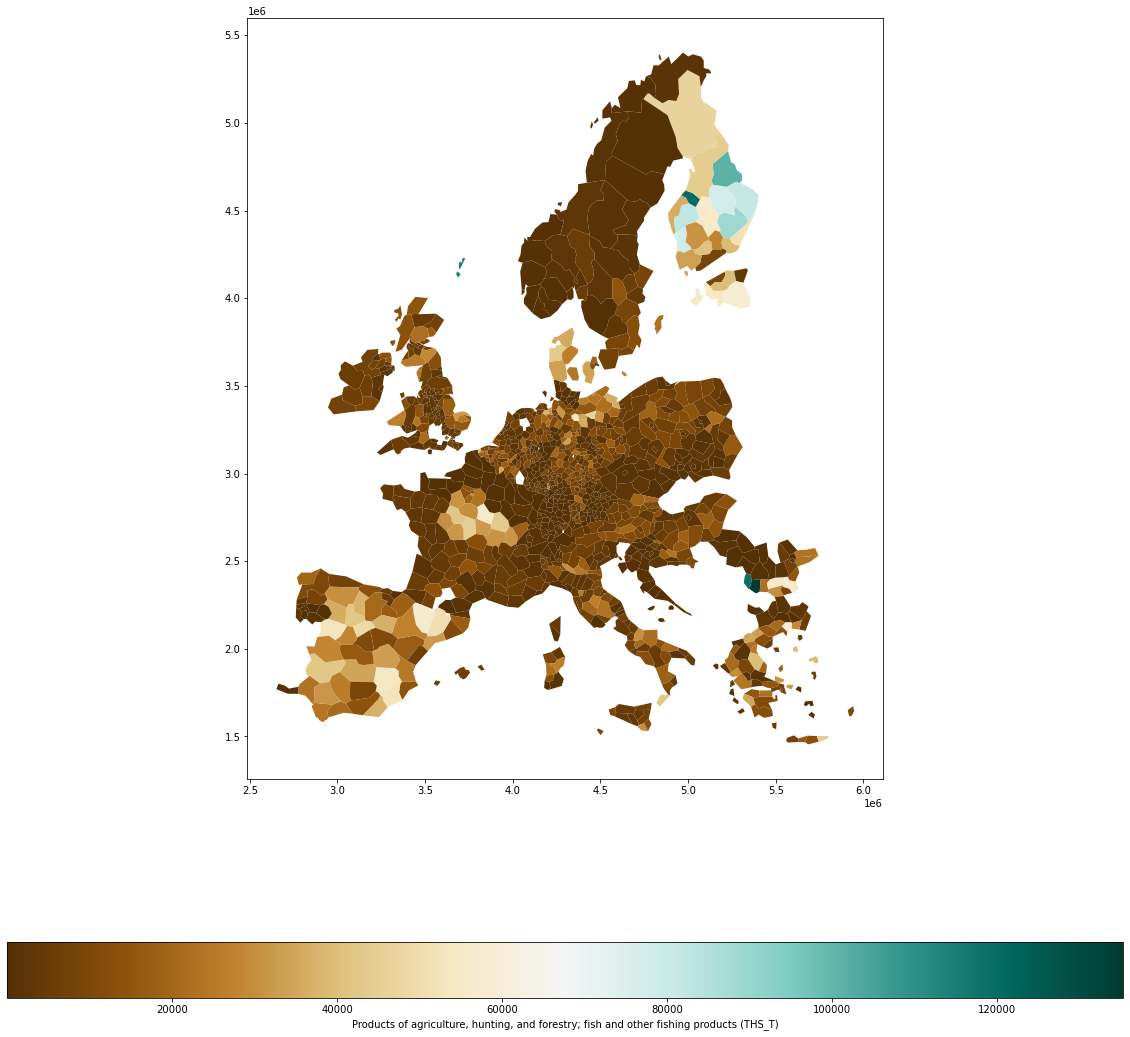

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
gdf_select.plot(column = '2019', 
          ax = ax, 
          legend=True,
         legend_kwds = {'label': 'Products of agriculture, hunting, and forestry; fish and other fishing products (THS_T)',
                        'orientation': "horizontal"},
         cmap = 'BrBG',
         
         )
        

# Calculating Energy consumption of Transport fleet

Calculating the share that each region has compared to its national transport 

In [31]:
#load national transport amount with NUTS 3 regions, take average of un- loading, sum up total transport
df_average_transport_total_EC = df_unloading_nuts3.add(df_loading_nuts3).div(2)
df_average_transport_total_EC = df_average_transport_total_EC.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
sum_total_national_transport = df_average_transport_total_EC.groupby('country').sum()

In [32]:
df_average_transport_total_EC.iloc[1320:1522]

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKH25,UK,6905.5,6347.0,6146.0,7611.0,8662.5,6463.0,5062.0,9614.0,NaN,NaN,NaN,NaN
UKH31,UK,1801.0,721.0,435.5,1118.5,530.5,1480.5,1016.5,732.0,713.5,1004.0,826.5,1082.5
UKH32,UK,25947.5,25773.0,21504.5,27454.0,21428.0,15625.5,19223.0,19511.5,28540.0,24604.5,18238.0,26465.0
UKH34,UK,7874.5,9607.5,7725.0,5770.5,6262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH35,UK,6341.0,5087.0,6735.0,7111.5,6451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,8230.0,7594.0,6323.0,8149.5,5257.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,7337.0,9184.0,9038.5,12646.0,9626.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,2770.0,2196.0,2311.0,2416.5,1317.0,1453.5,1216.5,1337.0,1936.5,2065.5,3413.5,1993.5


In [33]:
#test if the tables are summed up correctly
test = df_average_transport_total_EC.xs('UK', level='country')
test.sum()

2019     1453669.5
2018     1408268.5
2017     1260223.5
2016     1288953.0
2015     1307366.5
2014      913905.5
2013      924387.0
2012      995509.0
2011      838530.0
2010      873381.0
2009      833711.0
2008      987731.5
dtype: float64

In [34]:
sum_total_national_transport

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,377402.0,367527.5,360241.0,350227.0,325651.0,323233.5,300228.5,305378.5,313114.5,299971.5,303059.0,332079.0
BE,229611.0,233204.5,238837.5,233722.0,234554.0,250709.5,248857.0,239135.0,233721.0,237050.0,233592.0,249626.5
BG,97573.5,121892.5,119698.0,114631.0,134360.5,134264.0,138756.0,122173.0,121627.5,118090.5,136857.0,168592.5
CH,289299.0,283433.5,281639.0,274094.0,278494.0,290786.0,283820.0,287500.0,287909.0,269302.0,270984.5,275411.0
CY,29333.0,29280.0,25569.0,19661.0,14384.0,14569.0,16099.0,22941.0,26018.0,32216.0,28493.0,41601.0
CZ,475527.0,446685.5,418791.0,383311.5,375350.0,324080.5,289114.0,281340.0,288522.5,301390.0,324977.5,382382.5
DE,3093879.0,3078252.5,3022419.0,2969829.5,2894485.0,2848168.0,2737923.0,2686772.0,2495777.0,2274422.0,2299569.5,2547768.0
DK,162569.0,162033.0,174017.5,178672.5,175130.5,171258.5,165531.5,167193.0,169413.0,156751.0,137872.0,179252.0


In [35]:
#calculates the share that each region has of the total goods transported in the country and tests if it has been calculated correctly (assert if sum of all shares = 1 rounded to two decimals)
share_total_national_transport_region = df_average_transport_total_EC.divide(sum_total_national_transport, level = 'country')
test = share_total_national_transport_region.sum(level='country', min_count=1)
test.columns = test.columns.astype(int) #  test.columns.str.strip()
assert (test[2019].dropna().round(2) == 1.00).all()

In [36]:
share_total_national_transport_region

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
CZ052,CZ,0.064279,0.054079,0.053354,0.060268,0.056646,0.050714,0.053494,0.050371,0.061567,0.042337,0.052482,0.047574
CZ053,CZ,0.057333,0.040995,0.047622,0.053226,0.051681,0.051122,0.051582,0.044601,0.049842,0.045347,0.049988,0.051003
CZ063,CZ,0.046840,0.060562,0.047191,0.055554,0.051753,0.049812,0.045072,0.037080,0.046558,0.050990,0.057999,0.053330
CZ064,CZ,0.104410,0.106527,0.104341,0.100842,0.107433,0.110355,0.101308,0.092257,0.090275,0.093213,0.096997,0.104401
CZ071,CZ,0.076863,0.076764,0.066987,0.066376,0.066390,0.079033,0.059738,0.082032,0.069074,0.062260,0.074907,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,0.005662,0.005392,0.005017,0.006323,0.004021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,0.005047,0.006521,0.007172,0.009811,0.007363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,0.001906,0.001559,0.001834,0.001875,0.001007,0.001590,0.001316,0.001343,0.002309,0.002365,0.004094,0.002018


In [37]:
share_total_national_transport_region_filledna = share_total_national_transport_region.interpolate(method ='linear', axis = 1, limit_direction ='backward')
share_total_national_transport_region_filledna

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
CZ052,CZ,0.064279,0.054079,0.053354,0.060268,0.056646,0.050714,0.053494,0.050371,0.061567,0.042337,0.052482,0.047574
CZ053,CZ,0.057333,0.040995,0.047622,0.053226,0.051681,0.051122,0.051582,0.044601,0.049842,0.045347,0.049988,0.051003
CZ063,CZ,0.046840,0.060562,0.047191,0.055554,0.051753,0.049812,0.045072,0.037080,0.046558,0.050990,0.057999,0.053330
CZ064,CZ,0.104410,0.106527,0.104341,0.100842,0.107433,0.110355,0.101308,0.092257,0.090275,0.093213,0.096997,0.104401
CZ071,CZ,0.076863,0.076764,0.066987,0.066376,0.066390,0.079033,0.059738,0.082032,0.069074,0.062260,0.074907,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,0.005662,0.005392,0.005017,0.006323,0.004021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,0.005047,0.006521,0.007172,0.009811,0.007363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,0.001906,0.001559,0.001834,0.001875,0.001007,0.001590,0.001316,0.001343,0.002309,0.002365,0.004094,0.002018


1. Try to calculate enrgy consumption of transport fleet
international transport (country, (THS_t)) + national transport (country, (THS_t)) = total transport (THS_t)
Mio_Tkm of total transport (country) / total transport (THS_t) = km driven total transport (Country, (THS_km))
km driven total transport (Country, (THS_km)) * share of transport of each region (region) = km driven each region (THS_km)
km driven each region (THS_km) * energy consumption per km = Energy consumtion of transport (MWh)

In [38]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
df_average_transport_total_int_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AT,9917.5,10505.0,10841.5,10602.5,10228.0,10478.5,10034.0,11545.5,13000.5,12434.5,13583.0,15152.5
BE,21691.0,21912.0,25084.5,23268.0,24790.0,20476.0,21856.0,22092.5,23466.5,24614.5,26847.0,28289.5
BG,3936.0,4904.0,5675.0,6139.0,6145.0,4848.0,5483.5,4492.5,4527.0,3401.5,3223.5,3041.5
CH,5400.5,4046.5,4150.5,4512.5,4674.5,5082.0,4785.5,5584.5,6533.5,5392.5,5505.0,6493.5
CY,14.5,14.5,13.0,10.5,9.0,8.5,11.0,11.5,16.0,15.5,15.0,9.0
CZ,12681.5,14934.0,17784.5,20432.0,24781.0,23080.0,22553.0,20317.0,21474.0,19909.0,16764.5,18799.5
DE,49090.5,52702.5,53574.0,54965.0,53531.5,54960.0,55585.0,56703.0,60667.5,60049.0,61187.0,73419.5
DK,2054.0,2267.0,1932.0,2210.0,1987.5,2364.0,2887.5,3239.5,3202.5,3446.5,4897.5,6452.0
EE,1310.5,1384.0,1577.0,1753.0,1456.0,1620.0,1582.5,1486.0,1689.0,1429.5,1272.0,1971.5


In [39]:
#loading and filtering MIO_Tkm dataset 
df_total_transport_mio_Tkm_country_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.loc[('TOT', 'TOTAL', 'MIO_TKM')]
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Tkm_country_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,26444.0,25763.0,25978.0,26138.0,25458.0,25260.0,24213.0,26089.0,28542.0,28659.0,...,34313.0,37402.0,39187.0,37044.0,39186.0,39557.0,38498.0,37532.0,35122.0,33981.0
BE,34829.0,32685.0,34220.0,35192.0,36078.0,31808.0,32796.0,32105.0,33107.0,35002.0,...,38356.0,42085.0,43017.0,43847.0,47878.0,50542.0,52889.0,53182.0,51047.0,37284.0
BG,20551.0,NaN,35150.0,NaN,32297.0,NaN,27097.0,NaN,21214.0,19433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,11947.0,NaN,12441.0,NaN,12817.0,12966.0,13567.0,NaN,...,13911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,858.0,892.0,826.0,703.0,563.0,538.0,634.0,896.0,941.0,1087.0,...,1308.0,1202.0,1165.0,1393.0,1119.0,1401.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,50315.0,58715.0,54092.0,54893.0,51228.0,54830.0,51832.0,...,50877.0,48141.0,NaN,NaN,46011.0,NaN,NaN,39067.0,37310.0,NaN
DE,311875.0,316772.0,313149.0,315774.0,314816.0,310142.0,305744.0,307009.0,323833.0,313104.0,...,341532.0,343447.0,330016.0,310103.0,303752.0,290745.0,285214.0,288964.0,280708.0,278427.0
DK,14991.0,14998.0,15502.0,16094.0,15500.0,16184.0,NaN,16679.0,16120.0,15018.0,...,NaN,NaN,21254.0,NaN,NaN,NaN,22516.0,NaN,24021.0,23236.0
EE,4794.0,5775.0,NaN,6716.0,NaN,6310.0,5986.0,5791.0,5912.0,NaN,...,7354.0,6417.0,NaN,NaN,NaN,3974.0,NaN,NaN,NaN,NaN


In [40]:
#sum of int + national transport on country level, devide mio Tkm per country by the THS_t transport per country and multipy that with the share of transport per region
total_national_international_transport_country_test = pd.concat((df_average_transport_total_int_EC, sum_total_national_transport))
total_national_international_transport_country_test = total_national_international_transport_country_test.groupby('country').sum()
km_driven_country = df_total_transport_mio_Tkm_country_EC.divide(total_national_international_transport_country_test)
km_driven_region_test = share_total_national_transport_region.multiply(km_driven_country)
km_driven_region_test.sum(level = 'country') 

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
CZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126818,...,0.161320,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,0.000000,0.000000,0.000000
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130297,...,0.134122,0.126673,0.111905,0.109448,0.106830,0.106789,0.104395,0.101804,0.101174,0.099229
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098819,...,0.091736,0.087521,0.082319,0.078040,0.075694,0.075795,0.072439,0.070006,0.068150,0.068274
BE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138013,...,0.133767,0.128727,0.122901,0.121147,0.117292,0.139113,0.136939,0.129660,0.128118,0.138594
BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.159953,0.168159,0.000000,0.187861,0.000000,0.229863,0.000000,0.280363,0.000000,0.202454
CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049346,...,0.000000,0.046077,0.044240,0.044410,0.000000,0.043935,0.000000,0.041803,0.000000,0.000000
CY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031435,...,0.033725,0.036145,0.039037,0.039354,0.036906,0.039116,0.035737,0.032288,0.030449,0.029236
EL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490134,...,0.607063,0.000000,0.000000,0.462947,0.564312,0.047247,0.049967,0.073826,0.082092,0.080670


In [41]:
total_national_international_transport_country_test

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,387319.5,378032.5,371082.5,360829.5,335879.0,333712.0,310262.5,316924.0,326115.0,312406.0,316642.0,347231.5
BE,251302.0,255116.5,263922.0,256990.0,259344.0,271185.5,270713.0,261227.5,257187.5,261664.5,260439.0,277916.0
BG,101509.5,126796.5,125373.0,120770.0,140505.5,139112.0,144239.5,126665.5,126154.5,121492.0,140080.5,171634.0
CH,294699.5,287480.0,285789.5,278606.5,283168.5,295868.0,288605.5,293084.5,294442.5,274694.5,276489.5,281904.5
CY,29347.5,29294.5,25582.0,19671.5,14393.0,14577.5,16110.0,22952.5,26034.0,32231.5,28508.0,41610.0
CZ,488208.5,461619.5,436575.5,403743.5,400131.0,347160.5,311667.0,301657.0,309996.5,321299.0,341742.0,401182.0
DE,3142969.5,3130955.0,3075993.0,3024794.5,2948016.5,2903128.0,2793508.0,2743475.0,2556444.5,2334471.0,2360756.5,2621187.5
DK,164623.0,164300.0,175949.5,180882.5,177118.0,173622.5,168419.0,170432.5,172615.5,160197.5,142769.5,185704.0


In [42]:
km_driven_region_test

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006033,...,0.006830,0.010890,0.008554,0.009422,0.007902,0.008312,0.007511,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006468,...,0.007315,0.008816,0.007574,0.009085,0.007965,0.007584,0.006633,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006763,...,0.008226,0.008235,0.006297,0.007938,0.007761,0.007594,0.006923,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013240,...,0.015037,0.015967,0.015667,0.017843,0.017195,0.015765,0.012567,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008010,...,0.010044,0.012217,0.013931,0.010521,0.012314,0.009742,0.008272,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000757,NaN,0.000607,0.000623
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001174,NaN,0.000734,0.000556
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000325,...,NaN,NaN,0.000202,0.000197,0.000233,NaN,0.000224,NaN,0.000175,0.000210


2. Try to calculate energy consumption of vehicle fleet
Million vehicle-kilometers * energy consumption per kilometer * share of each region = energyconsumtion of fleet

In [43]:
df_total_transport_mio_Vkm_country_2 = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Vkm_country_2 = df_total_transport_mio_Vkm_country_2.loc[('TOT', 'TOTAL', 'MIO_VKM')]
df_total_transport_mio_Vkm_country_2 = df_total_transport_mio_Vkm_country_2.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Vkm_country_2.columns = df_total_transport_mio_Vkm_country_2.columns.astype(int)
df_total_transport_mio_Vkm_country_2

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,2713.0,2678.0,2671.0,2643.0,2573.0,2500.0,2411.0,2512.0,2690.0,2709.0,...,3154.0,3327.0,3391.0,3137.0,3268.0,3328.0,3235.0,3218.0,3087.0,3057.0
BE,2807.0,2554.0,2774.0,2728.0,2850.0,2373.0,2378.0,2326.0,2392.0,2478.0,...,2678.0,3173.0,3419.0,3355.0,3755.0,3869.0,4208.0,4316.0,4034.0,3103.0
BG,1634.0,NaN,2737.0,NaN,2653.0,NaN,2380.0,NaN,2060.0,1944.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,1865.0,NaN,1875.0,NaN,1912.0,1918.0,1968.0,NaN,...,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,146.0,142.0,134.0,119.0,96.0,89.0,102.0,137.0,151.0,150.0,...,210.0,161.0,155.0,196.0,143.0,206.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,5114.0,5527.0,5138.0,5056.0,4788.0,5028.0,4876.0,...,5364.0,5279.0,NaN,NaN,5495.0,NaN,NaN,5267.0,6218.0,NaN
DE,30110.0,30416.0,30123.0,30237.0,30083.0,29582.0,29009.0,29106.0,30347.0,29295.0,...,31787.0,31460.0,30243.0,28853.0,28792.0,27911.0,28025.0,29030.0,28734.0,28796.0
DK,1475.0,1465.0,1494.0,1556.0,1575.0,1636.0,NaN,1691.0,1697.0,1692.0,...,NaN,NaN,2210.0,NaN,NaN,NaN,2324.0,NaN,2387.0,2347.0
EE,357.0,417.0,NaN,495.0,NaN,456.0,464.0,438.0,451.0,NaN,...,603.0,537.0,NaN,NaN,NaN,527.0,NaN,NaN,NaN,NaN


In [44]:
df_total_transport_mio_Vkm_country_2_filledna = df_total_transport_mio_Vkm_country_2.interpolate(method ='linear', axis = 1)
df_total_transport_mio_Vkm_country_2_filledna

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,2713.0,2678.000000,2671.000000,2643.000000,2573.000000,2500.000000,2411.000000,2512.000000,2690.000000,2709.000000,...,3154.000000,3327.000000,3391.000000,3137.000000,3268.000000,3328.000000,3235.0,3218.0,3087.0,3057.0
BE,2807.0,2554.000000,2774.000000,2728.000000,2850.000000,2373.000000,2378.000000,2326.000000,2392.000000,2478.000000,...,2678.000000,3173.000000,3419.000000,3355.000000,3755.000000,3869.000000,4208.0,4316.0,4034.0,3103.0
BG,1634.0,2185.500000,2737.000000,2695.000000,2653.000000,2516.500000,2380.000000,2220.000000,2060.000000,1944.000000,...,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.0,1944.0,1944.0,1944.0
CH,NaN,NaN,1865.000000,1870.000000,1875.000000,1893.500000,1912.000000,1918.000000,1968.000000,1972.000000,...,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.0,1980.0,1980.0,1980.0
CY,146.0,142.000000,134.000000,119.000000,96.000000,89.000000,102.000000,137.000000,151.000000,150.000000,...,210.000000,161.000000,155.000000,196.000000,143.000000,206.000000,206.0,206.0,206.0,206.0
CZ,NaN,NaN,NaN,5114.000000,5527.000000,5138.000000,5056.000000,4788.000000,5028.000000,4876.000000,...,5364.000000,5279.000000,5351.000000,5423.000000,5495.000000,5419.000000,5343.0,5267.0,6218.0,6218.0
DE,30110.0,30416.000000,30123.000000,30237.000000,30083.000000,29582.000000,29009.000000,29106.000000,30347.000000,29295.000000,...,31787.000000,31460.000000,30243.000000,28853.000000,28792.000000,27911.000000,28025.0,29030.0,28734.0,28796.0
DK,1475.0,1465.000000,1494.000000,1556.000000,1575.000000,1636.000000,1663.500000,1691.000000,1697.000000,1692.000000,...,1978.666667,2094.333333,2210.000000,2238.500000,2267.000000,2295.500000,2324.0,2355.5,2387.0,2347.0
EE,357.0,417.000000,456.000000,495.000000,475.500000,456.000000,464.000000,438.000000,451.000000,442.000000,...,603.000000,537.000000,534.500000,532.000000,529.500000,527.000000,527.0,527.0,527.0,527.0


In [45]:
toe = pd.read_excel('C:/Users/seanp/python/anaconda3/envs/python_backup/my_python_work/Data/Fuel_Consumption.xlsx', sheet_name = 'Summary_Fuel_Efficiency')
toe = toe.set_index('country')
toe = toe.drop(columns=['Type'])
toe.columns = toe.columns.astype(int)
toe

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
UK,41.42,41.86,41.83,41.56,42.20,43.01,42.03,44.34,44.12,46.24,...,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
SK,41.41,37.35,45.39,31.05,32.32,42.31,46.30,46.35,45.29,41.70,...,19.123067,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
SL,24.88,33.22,33.14,37.06,41.35,46.52,50.52,66.04,92.44,66.86,...,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
SE,52.19,52.26,50.34,52.50,54.70,55.98,56.74,54.75,55.74,54.67,...,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
RO,40.98,54.61,57.83,58.29,48.39,34.84,42.23,36.10,37.80,41.69,...,19.512485,19.341010,19.216679,19.136545,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
PT,41.53,41.83,40.95,52.53,49.43,44.98,46.18,43.83,45.29,45.98,...,19.303310,19.167135,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
PL,14.76,16.79,13.04,19.49,23.74,30.15,35.14,39.81,39.98,39.37,...,19.145949,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
AT,66.75,76.43,86.34,94.03,91.28,94.16,77.00,72.65,61.68,67.23,...,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807
BE,52.23,50.34,50.78,54.08,53.92,54.83,56.55,58.89,61.06,59.46,...,19.486532,19.324583,19.208066,19.133550,19.097807,19.097807,19.097807,19.097807,19.097807,19.097807


In [46]:
toe_mio_Vkm_country = toe.multiply(df_total_transport_mio_Vkm_country_2_filledna)
toe_mio_Vkm_country.columns = toe_mio_Vkm_country.columns.astype(str)
print(toe_mio_Vkm_country.columns)

Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034',
       '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043',
       '2044', '2045', '2046', '2047', '2048', '2049', '2050'],
      dtype='object')


In [47]:
share_total_national_transport_region_filledna.columns = share_total_national_transport_region_filledna.columns.str.replace(' ', '')
print(share_total_national_transport_region_filledna.columns)

Index(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008'],
      dtype='object')


In [48]:
MWh_region = toe_mio_Vkm_country.multiply(share_total_national_transport_region_filledna)
MWh_region

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13297.816779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14256.145548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14906.727245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29181.878551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17653.790184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1888.836898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
MWh_region_filledna = MWh_region.interpolate(method ='linear', axis = 1)
MWh_region_filledna

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13297.816779,...,14603.996140,14603.996140,14603.996140,14603.996140,14603.996140,14603.996140,14603.996140,14603.996140,14603.996140,14603.996140
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14256.145548,...,12897.462470,12897.462470,12897.462470,12897.462470,12897.462470,12897.462470,12897.462470,12897.462470,12897.462470,12897.462470
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14906.727245,...,13461.671138,13461.671138,13461.671138,13461.671138,13461.671138,13461.671138,13461.671138,13461.671138,13461.671138,13461.671138
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29181.878551,...,24435.766802,24435.766802,24435.766802,24435.766802,24435.766802,24435.766802,24435.766802,24435.766802,24435.766802,24435.766802
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17653.790184,...,16083.898093,16083.898093,16083.898093,16083.898093,16083.898093,16083.898093,16083.898093,16083.898093,16083.898093,16083.898093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4161.554291,4161.554291,4161.554291,4161.554291,4161.554291,4161.554291,4161.554291,4161.554291,4161.554291,4161.554291
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3710.002896,3710.002896,3710.002896,3710.002896,3710.002896,3710.002896,3710.002896,3710.002896,3710.002896,3710.002896
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1888.836898,...,1400.668941,1400.668941,1400.668941,1400.668941,1400.668941,1400.668941,1400.668941,1400.668941,1400.668941,1400.668941


<AxesSubplot:>

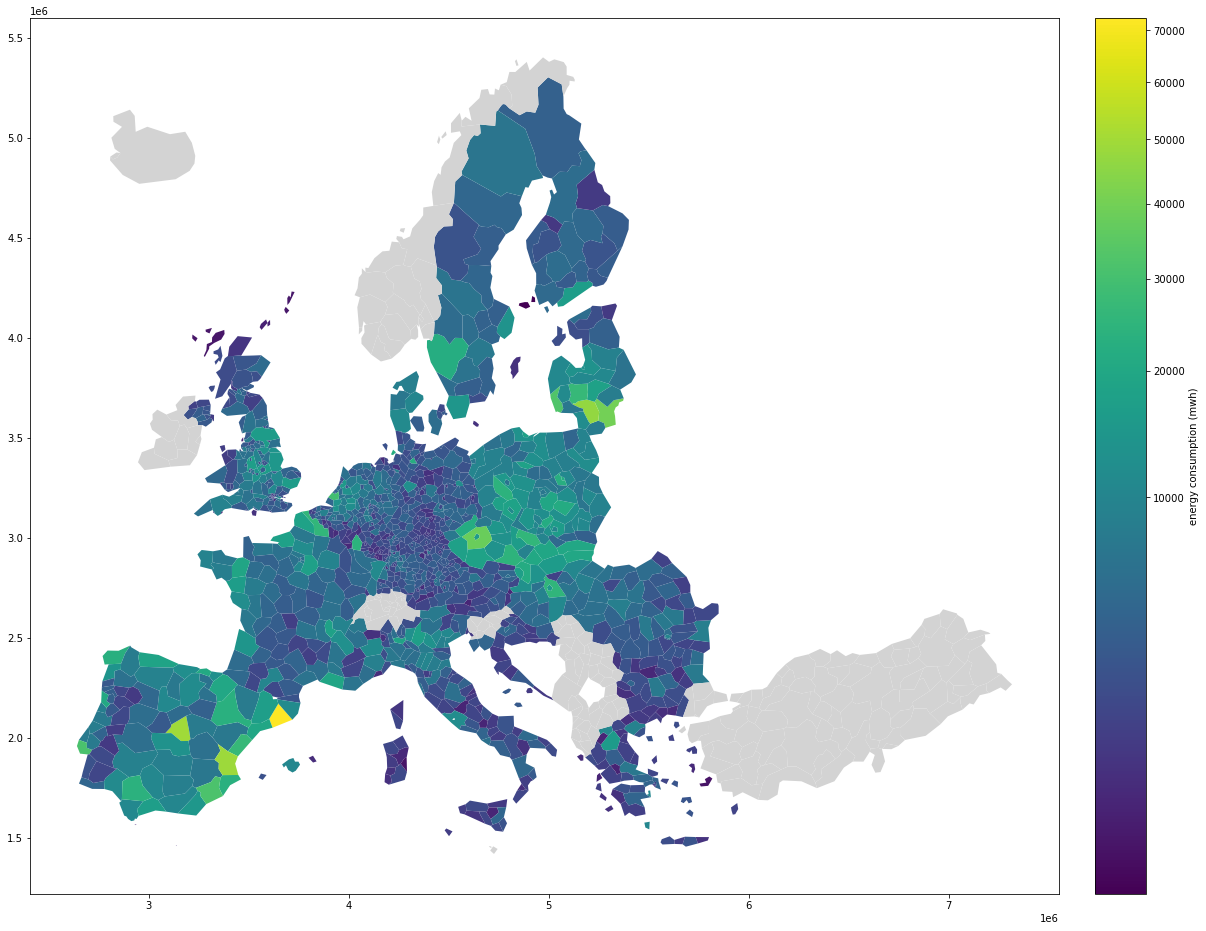

In [50]:
gdf_MWh_region = gdf_dw.join(MWh_region_filledna)
gdf_MWh_region = gdf_MWh_region.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000', 'FRY10', 'FRY20', 'FRY30', 'FRY40', 'FRY50', 'PT300', 'PT200'])

fig, ax = plt.subplots(1, 1, figsize = (20,20))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
gdf_MWh_region = gdf_MWh_region.cx[0.22:,1:]

gdf_MWh_region.plot(column = '2050', 
         ax = ax, 
         legend=True,
         cax = cax,
         legend_kwds = {'label': 'energy consumption (mwh)'},
         cmap = 'viridis',
         norm=mcolors.PowerNorm(0.4),
         missing_kwds= dict(color = "lightgrey")
         )

<AxesSubplot:>

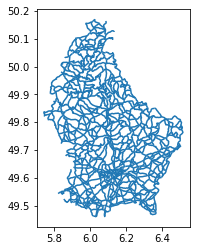

In [51]:
roads=gpd.read_file('C:/Users/seanp/Desktop/RoadL')
roads.plot()

<AxesSubplot:>

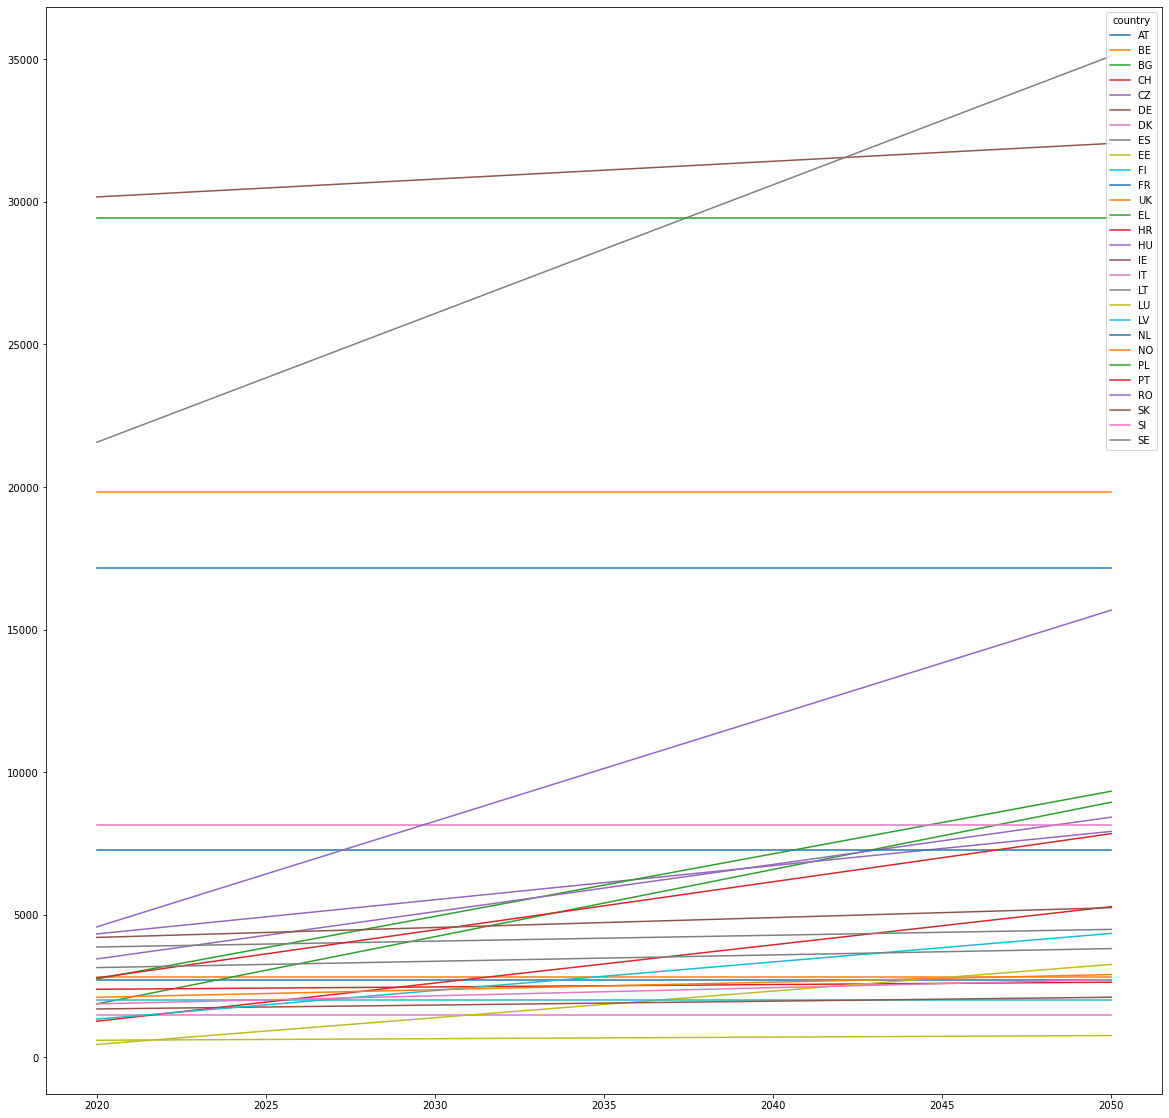

In [52]:
T_Demand = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'Demand_prediction_Pop_Size_GDP')
T_Demand = T_Demand.set_index('country')
fig, ax = plt.subplots(1, 1, figsize = (20,20))
T_Demand.T.plot(ax=ax)

# 1. Scenario 100% BEV for distance class <50km, 50 - 149km, 150 -299km. 30% BEV and 70% CEV for 300 - 499km. 100% CEV >500km

In [107]:
Mio_Vkm = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'vkm_distance_class')
Mio_Vkm = Mio_Vkm.set_index(['country','distance_class'])
kWh_km = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Vehicle Fuel Efficiency/FE_By_Country_P.xlsx')
kWh_km = kWh_km.set_index(['country','distance_class','Powertrain'])
powertrain_share = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Scenarios/VSM_Results/VSM_Results.xlsm', sheet_name = '100%_BEV_CEV')
powertrain_share = powertrain_share.set_index(['Lifetime','distance_class','Powertrain'])
transport_share_region = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/transport_share_region.xlsx', sheet_name = 'regional_transport_share_2050')
transport_share_region = transport_share_region.set_index(['country','id'])

In [54]:
Mio_Vkm

2020        2021        2022        2023  \
country distance_class                                                   
AT      50km            559.000000  559.000000  559.000000  559.000000   
        50-149km        847.000000  847.000000  847.000000  847.000000   
        150-299km       895.000000  895.000000  895.000000  895.000000   
        300-499km       520.000000  520.000000  520.000000  520.000000   
        500km           768.000000  768.000000  768.000000  768.000000   
...                            ...         ...         ...         ...   
SE      50km            315.902705  315.805410  315.708115  315.610820   
        50-149km        574.822960  574.645920  574.468880  574.291840   
        150-299km       690.787244  690.574488  690.361732  690.148976   
        300-499km       499.846052  499.692104  499.538156  499.384208   
        500km           554.829118  554.658236  554.487354  554.316471   

                              2024        2025        2026        2027  \
country distance_class                                                   
AT      50km            559.000000  559.000000  559.000000  559.000000   
        50-149km        847.000000  847.000000  847.000000  847.000000   
        150-299km       895.000000  895.000000  895.000000  895.000000   
        300-499km       520.000000  520.000000  520.000000  520.000000   
        500km           768.000000  768.000000  768.000000  768.000000   
...                            ...         ...         ...         ...   
SE      50km            315.513525  315.416230  315.318935  315.221639   
        50-149km        574.114800  573.937760  573.760719  573.583679   
        150-299km       689.936220  689.723464  689.510708  689.297952   
        300-499km       499.230261  499.076313  498.922365  498.768417   
        500km           554.145589  553.974707  553.803825  553.632943   

                              2028        2029  ...        2041        2042  \
country distance_class                          ...                           
AT      50km            559.000000  559.000000  ...  559.000000  559.000000   
        50-149km        847.000000  847.000000  ...  847.000000  847.000000   
        150-299km       895.000000  895.000000  ...  895.000000  895.000000   
        300-499km       520.000000  520.000000  ...  520.000000  520.000000   
        500km           768.000000  768.000000  ...  768.000000  768.000000   
...                            ...         ...  ...         ...         ...   
SE      50km            315.124344  315.027049  ...  313.859509  313.762213   
        50-149km        573.406639  573.229599  ...  571.105118  570.928078   
        150-299km       689.085196  688.872440  ...  686.319368  686.106612   
        300-499km       498.614469  498.460521  ...  496.613146  496.459198   
        500km           553.462061  553.291178  ...  551.240592  551.069710   

                              2043        2044        2045        2046  \
country distance_class                                                   
AT      50km            559.000000  559.000000  559.000000  559.000000   
        50-149km        847.000000  847.000000  847.000000  847.000000   
        150-299km       895.000000  895.000000  895.000000  895.000000   
        300-499km       520.000000  520.000000  520.000000  520.000000   
        500km           768.000000  768.000000  768.000000  768.000000   
...                            ...         ...         ...         ...   
SE      50km            313.664918  313.567623  313.470328  313.373033   
        50-149km        570.751038  570.573998  570.396958  570.219918   
        150-299km       685.893856  685.681100  685.468344  685.255588   
        300-499km       496.305251  496.151303  495.997355  495.843407   
        500km           550.898828  550.727946  550.557064  550.386182   

                              2047        2048        2049        2050  
country distance_class                  

In [108]:
transport_share_region

2020      2021      2022      2023      2024      2025  \
country id                                                                  
BE      BE100  0.026605  0.026605  0.026605  0.026605  0.026605  0.026605   
        BE211  0.111116  0.111116  0.111116  0.111116  0.111116  0.111116   
        BE212  0.037319  0.037319  0.037319  0.037319  0.037319  0.037319   
        BE213  0.056494  0.056494  0.056494  0.056494  0.056494  0.056494   
        BE221  0.050518  0.050518  0.050518  0.050518  0.050518  0.050518   
...                 ...       ...       ...       ...       ...       ...   
CH      CH063  0.023657  0.023657  0.023657  0.023657  0.023657  0.023657   
        CH064  0.006951  0.006951  0.006951  0.006951  0.006951  0.006951   
        CH065  0.007963  0.007963  0.007963  0.007963  0.007963  0.007963   
        CH066  0.012341  0.012341  0.012341  0.012341  0.012341  0.012341   
        CH070  0.035988  0.035988  0.035988  0.035988  0.035988  0.035988   

                   2026      2027      2028      2029  ...      2041  \
country id                                             ...             
BE      BE100  0.026605  0.026605  0.026605  0.026605  ...  0.026605   
        BE211  0.111116  0.111116  0.111116  0.111116  ...  0.111116   
        BE212  0.037319  0.037319  0.037319  0.037319  ...  0.037319   
        BE213  0.056494  0.056494  0.056494  0.056494  ...  0.056494   
        BE221  0.050518  0.050518  0.050518  0.050518  ...  0.050518   
...                 ...       ...       ...       ...  ...       ...   
CH      CH063  0.023657  0.023657  0.023657  0.023657  ...  0.023657   
        CH064  0.006951  0.006951  0.006951  0.006951  ...  0.006951   
        CH065  0.007963  0.007963  0.007963  0.007963  ...  0.007963   
        CH066  0.012341  0.012341  0.012341  0.012341  ...  0.012341   
        CH070  0.035988  0.035988  0.035988  0.035988  ...  0.035988   

                   2042      2043      2044      2045      2046      2047  \
country id                                                                  
BE      BE100  0.026605  0.026605  0.026605  0.026605  0.026605  0.026605   
        BE211  0.111116  0.111116  0.111116  0.111116  0.111116  0.111116   
        BE212  0.037319  0.037319  0.037319  0.037319  0.037319  0.037319   
        BE213  0.056494  0.056494  0.056494  0.056494  0.056494  0.056494   
        BE221  0.050518  0.050518  0.050518  0.050518  0.050518  0.050518   
...                 ...       ...       ...       ...       ...       ...   
CH      CH063  0.023657  0.023657  0.023657  0.023657  0.023657  0.023657   
        CH064  0.006951  0.006951  0.006951  0.006951  0.006951  0.006951   
        CH065  0.007963  0.007963  0.007963  0.007963  0.007963  0.007963   
        CH066  0.012341  0.012341  0.012341  0.012341  0.012341  0.012341   
        CH070  0.035988  0.035988  0.035988  0.035988  0.035988  0.035988   

                   2048      2049      2050  
country id                                   
BE      BE100  0.026605  0.026605  0.026605  
        BE211  0.111116  0.111116  0.111116  
        BE212  0.037319  0.037319  0.037319  
        BE213  0.056494  0.056494  0.056494  
        BE221  0.050518  0.050518  0.050518  
...                 ...       ...       ...  
CH      CH063  0.023657  0.023657  0.023657  
        CH064  0.006951  0.006951  0.006951  
        CH065  0.007963  0.007963  0.007963  
        CH066  0.012341  0.012341  0.012341  
        CH070  0.035988  0.035988  0.035988  

[1811 rows x 31 columns]

In [64]:
Vkm = Mio_Vkm.multiply(1000000)
Vkm

2020          2021          2022  \
country distance_class                                             
AT      50km            5.590000e+08  5.590000e+08  5.590000e+08   
        50-149km        8.470000e+08  8.470000e+08  8.470000e+08   
        150-299km       8.950000e+08  8.950000e+08  8.950000e+08   
        300-499km       5.200000e+08  5.200000e+08  5.200000e+08   
        500km           7.680000e+08  7.680000e+08  7.680000e+08   
...                              ...           ...           ...   
SE      50km            3.159027e+08  3.158054e+08  3.157081e+08   
        50-149km        5.748230e+08  5.746459e+08  5.744689e+08   
        150-299km       6.907872e+08  6.905745e+08  6.903617e+08   
        300-499km       4.998461e+08  4.996921e+08  4.995382e+08   
        500km           5.548291e+08  5.546582e+08  5.544874e+08   

                                2023          2024          2025  \
country distance_class                                             
AT      50km            5.590000e+08  5.590000e+08  5.590000e+08   
        50-149km        8.470000e+08  8.470000e+08  8.470000e+08   
        150-299km       8.950000e+08  8.950000e+08  8.950000e+08   
        300-499km       5.200000e+08  5.200000e+08  5.200000e+08   
        500km           7.680000e+08  7.680000e+08  7.680000e+08   
...                              ...           ...           ...   
SE      50km            3.156108e+08  3.155135e+08  3.154162e+08   
        50-149km        5.742918e+08  5.741148e+08  5.739378e+08   
        150-299km       6.901490e+08  6.899362e+08  6.897235e+08   
        300-499km       4.993842e+08  4.992303e+08  4.990763e+08   
        500km           5.543165e+08  5.541456e+08  5.539747e+08   

                                2026          2027          2028  \
country distance_class                                             
AT      50km            5.590000e+08  5.590000e+08  5.590000e+08   
        50-149km        8.470000e+08  8.470000e+08  8.470000e+08   
        150-299km       8.950000e+08  8.950000e+08  8.950000e+08   
        300-499km       5.200000e+08  5.200000e+08  5.200000e+08   
        500km           7.680000e+08  7.680000e+08  7.680000e+08   
...                              ...           ...           ...   
SE      50km            3.153189e+08  3.152216e+08  3.151243e+08   
        50-149km        5.737607e+08  5.735837e+08  5.734066e+08   
        150-299km       6.895107e+08  6.892980e+08  6.890852e+08   
        300-499km       4.989224e+08  4.987684e+08  4.986145e+08   
        500km           5.538038e+08  5.536329e+08  5.534621e+08   

                                2029  ...          2041          2042  \
country distance_class                ...                               
AT      50km            5.590000e+08  ...  5.590000e+08  5.590000e+08   
        50-149km        8.470000e+08  ...  8.470000e+08  8.470000e+08   
        150-299km       8.950000e+08  ...  8.950000e+08  8.950000e+08   
        300-499km       5.200000e+08  ...  5.200000e+08  5.200000e+08   
        500km           7.680000e+08  ...  7.680000e+08  7.680000e+08   
...                              ...  ...           ...           ...   
SE      50km            3.150270e+08  ...  3.138595e+08  3.137622e+08   
        50-149km        5.732296e+08  ...  5.711051e+08  5.709281e+08   
        150-299km       6.888724e+08  ...  6.863194e+08  6.861066e+08   
        300-499km       4.984605e+08  ...  4.966131e+08  4.964592e+08   
        500km           5.532912e+08  ...  5.512406e+08  5.510697e+08   

                                2043          2044          2045  \
country distance_class                                             
AT      50km            5.590000e+08  5.590000e+08  5.590000e+08   
        50-149km        8.470000e+08  8.470000e+08  8.470000e+08   
        150-299km       8.950000e+08  8.950000e+08  8.950000e+08   
        300-499km       5.200000e+08  5.200000e+08  5.200000e+08   
        500km      

In [55]:
kWh_km

2020      2021      2022  \
country distance_class Powertrain                                            
CH      50km           Diesel                 3.171725  3.117709  3.063693   
                       Biofuel                3.171725  3.117709  3.063693   
                       Synthetic DME          4.032836  3.958404  3.883971   
                       Synthetic Diesel       4.416170  4.326960  4.237749   
                       DME                    3.171725  3.117709  3.063693   
...                                                ...       ...       ...   
BE      500km          LNG HEV                2.301122  2.279603  2.258084   
                       Synthetic Methane HEV  1.623681  1.602255  1.580829   
                       BEV                    1.281265  1.258046  1.234826   
                       FCEV                   1.814906  1.805171  1.795436   
                       CEV                    1.152801  1.137052  1.121303   

                                                  2023      2024      2025  \
country distance_class Powertrain                                            
CH      50km           Diesel                 3.009677  2.955661  2.901645   
                       Biofuel                3.009677  2.955661  2.901645   
                       Synthetic DME          3.809539  3.735106  3.660673   
                       Synthetic Diesel       4.148539  4.059328  3.970118   
                       DME                    3.009677  2.955661  2.901645   
...                                                ...       ...       ...   
BE      500km          LNG HEV                2.236565  2.215046  2.193528   
                       Synthetic Methane HEV  1.559403  1.537977  1.516551   
                       BEV                    1.211607  1.188387  1.165168   
                       FCEV                   1.785701  1.775967  1.766232   
                       CEV                    1.105553  1.089804  1.074055   

                                                  2026      2027      2028  \
country distance_class Powertrain                                            
CH      50km           Diesel                 2.847629  2.793613  2.739597   
                       Biofuel                2.847629  2.793613  2.739597   
                       Synthetic DME          3.586241  3.511808  3.437375   
                       Synthetic Diesel       3.880908  3.791697  3.702487   
                       DME                    2.847629  2.793613  2.739597   
...                                                ...       ...       ...   
BE      500km          LNG HEV                2.172009  2.150490  2.128971   
                       Synthetic Methane HEV  1.495126  1.473700  1.452274   
                       BEV                    1.141949  1.118729  1.095510   
                       FCEV                   1.756497  1.746762  1.737027   
                       CEV                    1.058306  1.042557  1.026808   

                                                  2029  ...      2041  \
country distance_class Powertrain                       ...             
CH      50km           Diesel                 2.685581  ...  1.773347   
                       Biofuel                2.685581  ...  1.773347   
                       Synthetic DME          3.362943  ...  3.288510   
                       Synthetic Diesel       3.613276  ...  3.524066   
                       DME                    2.685581  ...  1.773347   
...                                                ...  ...       ...   
BE      500km          LNG HEV                2.107453  ...  2.085934   
                       Synthetic Methane HEV  1.430848  ...  1.409422   
                       BEV                    1.072290  ...  1.049071   
                       FCEV                   1.727292  ...  1.717557   
                       CEV                    1.011059  ...  0.995310   

                                                  2042 

In [56]:
powertrain_share

2020      2021      2022  \
Lifetime distance_class Powertrain                                            
8y       50km           Diesel                 0.987724  0.984706  0.980699   
                        Biofuel                0.000000  0.000000  0.000000   
                        Synthetic DME          0.000000  0.000000  0.000000   
                        Synthetic Diesel       0.000000  0.000000  0.000000   
                        DME                    0.000000  0.000000  0.000000   
...                                                 ...       ...       ...   
22y      500km          Synthetic Methane HEV  0.000000  0.000000  0.000000   
                        BEV                    0.000000  0.000000  0.000000   
                        FCEV                   0.000000  0.000000  0.000000   
                        CEV                    0.000045  0.000078  0.000144   
                        Total                  1.000000  1.000000  1.000000   

                                                   2023      2024      2025  \
Lifetime distance_class Powertrain                                            
8y       50km           Diesel                 0.975342  0.968134  0.958387   
                        Biofuel                0.000000  0.000000  0.000000   
                        Synthetic DME          0.000000  0.000000  0.000000   
                        Synthetic Diesel       0.000000  0.000000  0.000000   
                        DME                    0.000000  0.000000  0.000000   
...                                                 ...       ...       ...   
22y      500km          Synthetic Methane HEV  0.000000  0.000000  0.000000   
                        BEV                    0.000000  0.000000  0.000000   
                        FCEV                   0.000000  0.000000  0.000000   
                        CEV                    0.000280  0.000563  0.001164   
                        Total                  1.000000  1.000000  1.000000   

                                                   2026      2027      2028  \
Lifetime distance_class Powertrain                                            
8y       50km           Diesel                 0.945173  0.927289  0.892773   
                        Biofuel                0.000000  0.000000  0.000000   
                        Synthetic DME          0.000000  0.000000  0.000000   
                        Synthetic Diesel       0.000000  0.000000  0.000000   
                        DME                    0.000000  0.000000  0.000000   
...                                                 ...       ...       ...   
22y      500km          Synthetic Methane HEV  0.000000  0.000000  0.000000   
                        BEV                    0.000000  0.000000  0.000000   
                        FCEV                   0.000000  0.000000  0.000000   
                        CEV                    0.002450  0.005183  0.010843   
                        Total                  1.000000  1.000000  1.000000   

                                                   2029  ...      2041  \
Lifetime distance_class Powertrain                       ...             
8y       50km           Diesel                 0.843831  ...  0.009826   
                        Biofuel                0.000000  ...  0.000000   
                        Synthetic DME          0.000000  ...  0.000000   
                        Synthetic Diesel       0.000000  ...  0.000000   
                        DME                    0.000000  ...  0.000000   
...                                                 ...  ...       ...   
22y      500km          Synthetic Methane HEV  0.000000  ...  0.000000   
                        BEV                    0.000000  ...  0.000000   
                        FCEV                   0.000000  ...  0.000000   
                        CEV                    0.021925  ...  0.450829   
                        Total                  1.000000  ...  1.000000   

    

In [57]:
pow_share = powertrain_share.drop(index = 'Total', level = 2)


In [58]:
powertrain_share_8y = pow_share.loc['8y']
powertrain_share_8y

2020      2021      2022      2023  \
distance_class Powertrain                                                      
50km           Diesel                 0.987724  0.984706  0.980699  0.975342   
               Biofuel                0.000000  0.000000  0.000000  0.000000   
               Synthetic DME          0.000000  0.000000  0.000000  0.000000   
               Synthetic Diesel       0.000000  0.000000  0.000000  0.000000   
               DME                    0.000000  0.000000  0.000000  0.000000   
...                                        ...       ...       ...       ...   
500km          LNG HEV                0.000000  0.000000  0.000000  0.000000   
               Synthetic Methane HEV  0.000000  0.000000  0.000000  0.000000   
               BEV                    0.000000  0.000000  0.000000  0.000000   
               FCEV                   0.000000  0.000000  0.000000  0.000000   
               CEV                    0.000045  0.000078  0.000144  0.000280   

                                          2024      2025      2026      2027  \
distance_class Powertrain                                                      
50km           Diesel                 0.968134  0.958387  0.945173  0.927289   
               Biofuel                0.000000  0.000000  0.000000  0.000000   
               Synthetic DME          0.000000  0.000000  0.000000  0.000000   
               Synthetic Diesel       0.000000  0.000000  0.000000  0.000000   
               DME                    0.000000  0.000000  0.000000  0.000000   
...                                        ...       ...       ...       ...   
500km          LNG HEV                0.000000  0.000000  0.000000  0.000000   
               Synthetic Methane HEV  0.000000  0.000000  0.000000  0.000000   
               BEV                    0.000000  0.000000  0.000000  0.000000   
               FCEV                   0.000000  0.000000  0.000000  0.000000   
               CEV                    0.000563  0.001164  0.002450  0.005183   

                                          2028      2029  ...      2041  \
distance_class Powertrain                                 ...             
50km           Diesel                 0.892773  0.843831  ...  0.009826   
               Biofuel                0.000000  0.000000  ...  0.000000   
               Synthetic DME          0.000000  0.000000  ...  0.000000   
               Synthetic Diesel       0.000000  0.000000  ...  0.000000   
               DME                    0.000000  0.000000  ...  0.000000   
...                                        ...       ...  ...       ...   
500km          LNG HEV                0.000000  0.000000  ...  0.000000   
               Synthetic Methane HEV  0.000000  0.000000  ...  0.000000   
               BEV                    0.000000  0.000000  ...  0.000000   
               FCEV                   0.000000  0.000000  ...  0.000000   
               CEV                    0.012193  0.027387  ...  0.963954   

                                          2042      2043      2044      2045  \
distance_class Powertrain                                                      
50km           Diesel                 0.004524  0.002056  0.000929  0.000418   
               Biofuel                0.000000  0.000000  0.000000  0.000000   
               Synthetic DME          0.000000  0.000000  0.000000  0.000000   
               Synthetic Diesel       0.000000  0.000000  0.000000  0.000000   
               DME                    0.000000  0.000000  0.000000  0.000000   
...                                        ...       ...       ...       ...   
500km          LNG HEV                0.000000  0.000000  0.000000  0.000000   
               Synthetic Methane HEV  0.000000  0.000000  0.000000  0.000000   
               BEV                    0.000000  0.000000  0.000000  0.000000   
               FCEV                   0.000000  0.000000  0.000000  0.000000   
               CEV      

In [65]:
kWh_all_powertrains = Vkm.multiply(kWh_km)
kWh_all_powertrains

2020          2021  \
country distance_class Powertrain                                          
AT      150-299km      Diesel                 3.179020e+09  3.104428e+09   
                       Biofuel                3.179020e+09  3.104428e+09   
                       Synthetic DME          3.949715e+09  3.856851e+09   
                       Synthetic Diesel       4.292799e+09  4.186708e+09   
                       DME                    3.179020e+09  3.104428e+09   
...                                                    ...           ...   
UK      50km           LNG HEV                0.000000e+00  0.000000e+00   
                       Synthetic Methane HEV  2.768664e+09  2.724682e+09   
                       BEV                    8.442000e+08  8.179360e+08   
                       FCEV                   1.088080e+09  1.074948e+09   
                       CEV                    6.472200e+08  6.397160e+08   

                                                      2022          2023  \
country distance_class Powertrain                                          
AT      150-299km      Diesel                 3.029837e+09  2.955245e+09   
                       Biofuel                3.029837e+09  2.955245e+09   
                       Synthetic DME          3.763986e+09  3.671122e+09   
                       Synthetic Diesel       4.080617e+09  3.974527e+09   
                       DME                    3.029837e+09  2.955245e+09   
...                                                    ...           ...   
UK      50km           LNG HEV                0.000000e+00  0.000000e+00   
                       Synthetic Methane HEV  2.680700e+09  2.636719e+09   
                       BEV                    7.916720e+08  7.654080e+08   
                       FCEV                   1.061816e+09  1.048684e+09   
                       CEV                    6.322120e+08  6.247080e+08   

                                                      2024          2025  \
country distance_class Powertrain                                          
AT      150-299km      Diesel                 2.880654e+09  2.806062e+09   
                       Biofuel                2.880654e+09  2.806062e+09   
                       Synthetic DME          3.578257e+09  3.485393e+09   
                       Synthetic Diesel       3.868436e+09  3.762346e+09   
                       DME                    2.880654e+09  2.806062e+09   
...                                                    ...           ...   
UK      50km           LNG HEV                0.000000e+00  0.000000e+00   
                       Synthetic Methane HEV  2.592737e+09  2.548755e+09   
                       BEV                    7.391440e+08  7.128800e+08   
                       FCEV                   1.035552e+09  1.022420e+09   
                       CEV                    6.172040e+08  6.097000e+08   

                                                      2026          2027  \
country distance_class Powertrain                                          
AT      150-299km      Diesel                 2.731471e+09  2.656879e+09   
                       Biofuel                2.731471e+09  2.656879e+09   
                       Synthetic DME          3.392528e+09  3.299664e+09   
                       Synthetic Diesel       3.656255e+09  3.550165e+09   
                       DME                    2.731471e+09  2.656879e+09   
...                                                    ...           ...   
UK      50km           LNG HEV                0.000000e+00  0.000000e+00   
                       Synthetic Methane HEV  2.504773e+09  2.460791e+09   
                       BEV                    6.866160e+08  6.603520e+08   
                       FCEV                   1.009288e+09  9.961560e+08   
                       CEV                    6.021960e+08  5.946920e+08   

                                                      2028          2029  ...  \
country distance_

In [66]:
kWh_tot = kWh_all_powertrains.multiply(powertrain_share_8y)
kWh_tot

2020          2021  \
distance_class Powertrain            country                                
150-299km      BEV                   AT       727121.797134  1.059301e+06   
                                     BE       555705.926962  8.109784e+05   
                                     BG       145883.639984  2.451551e+05   
                                     CH       394124.794451  5.763218e+05   
                                     CZ       513781.458403  7.734423e+05   
...                                                     ...           ...   
50km           Synthetic Methane HEV RO            0.000000  0.000000e+00   
                                     SE            0.000000  0.000000e+00   
                                     SI            0.000000  0.000000e+00   
                                     SK            0.000000  0.000000e+00   
                                     UK            0.000000  0.000000e+00   

                                                      2022          2023  \
distance_class Powertrain            country                               
150-299km      BEV                   AT       1.597528e+06  2.484859e+06   
                                     BE       1.225237e+06  1.909360e+06   
                                     BG       4.189200e+05  7.281369e+05   
                                     CH       8.724555e+05  1.362318e+06   
                                     CZ       1.204495e+06  1.933487e+06   
...                                                    ...           ...   
50km           Synthetic Methane HEV RO       0.000000e+00  0.000000e+00   
                                     SE       0.000000e+00  0.000000e+00   
                                     SI       0.000000e+00  0.000000e+00   
                                     SK       0.000000e+00  0.000000e+00   
                                     UK       0.000000e+00  0.000000e+00   

                                                      2024          2025  \
distance_class Powertrain            country                               
150-299km      BEV                   AT       3.968936e+06  6.478357e+06   
                                     BE       3.055682e+06  4.997851e+06   
                                     BG       1.285255e+06  2.297406e+06   
                                     CH       2.184576e+06  3.580234e+06   
                                     CZ       3.185313e+06  5.359921e+06   
...                                                    ...           ...   
50km           Synthetic Methane HEV RO       0.000000e+00  0.000000e+00   
                                     SE       0.000000e+00  0.000000e+00   
                                     SI       0.000000e+00  0.000000e+00   
                                     SK       0.000000e+00  0.000000e+00   
                                     UK       0.000000e+00  0.000000e+00   

                                                      2026          2027  \
distance_class Powertrain            country                               
150-299km      BEV                   AT       1.074786e+07  1.800093e+07   
                                     BE       8.309282e+06  1.394763e+07   
                                     BG       4.142519e+06  7.492461e+06   
                                     CH       5.964327e+06  1.003157e+07   
                                     CZ       9.162784e+06  1.580620e+07   
...                                                    ...           ...   
50km           Synthetic Methane HEV RO       0.000000e+00  0.000000e+00   
                                     SE       0.000000e+00  0.000000e+00   
                                     SI       0.000000e+00  0.000000e+00   
                                     SK       0.000000e+00  0.000000e+00   
                                     UK       0.000000e+00  0.000000e+00   

                                                      2028          2029  ...  \
dista

In [98]:
share_total_national_transport_region_filledna = share_total_national_transport_region.interpolate(method ='linear', axis = 1)
share_total_national_transport_region_filledna.columns = share_total_national_transport_region_filledna.columns.astype(str)
share_total_national_transport_region_filledna.columns = share_total_national_transport_region_filledna.columns.str.replace(' ', '')

In [99]:
share_total_national_transport_region_filledna['mean'] = share_total_national_transport_region_filledna.mean(axis=1)
share_total_national_transport_region_filledna

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,mean
id,country,,,,,,,,,,,,,
CZ052,CZ,0.064279,0.054079,0.053354,0.060268,0.056646,0.050714,0.053494,0.050371,0.061567,0.042337,0.052482,0.047574,0.053931
CZ053,CZ,0.057333,0.040995,0.047622,0.053226,0.051681,0.051122,0.051582,0.044601,0.049842,0.045347,0.049988,0.051003,0.049528
CZ063,CZ,0.046840,0.060562,0.047191,0.055554,0.051753,0.049812,0.045072,0.037080,0.046558,0.050990,0.057999,0.053330,0.050228
CZ064,CZ,0.104410,0.106527,0.104341,0.100842,0.107433,0.110355,0.101308,0.092257,0.090275,0.093213,0.096997,0.104401,0.101030
CZ071,CZ,0.076863,0.076764,0.066987,0.066376,0.066390,0.079033,0.059738,0.082032,0.069074,0.062260,0.074907,0.063158,0.070298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,0.005662,0.005392,0.005017,0.006323,0.004021,0.004021,0.004021,0.004021,0.004021,0.004021,0.004021,0.004021,0.004547
UKH17,UK,0.005047,0.006521,0.007172,0.009811,0.007363,0.007363,0.007363,0.007363,0.007363,0.007363,0.007363,0.007363,0.007288
UKH21,UK,0.001906,0.001559,0.001834,0.001875,0.001007,0.001590,0.001316,0.001343,0.002309,0.002365,0.004094,0.002018,0.001935


In [109]:
kWh_tot_region = kWh_tot.multiply(transport_share_region)
kWh_tot_region

2020  \
country distance_class Powertrain            id                    
AT      150-299km      BEV                   AT111   3134.691026   
                                             AT112  14134.221749   
                                             AT113   6793.611773   
                                             AT121  32044.209865   
                                             AT122  24217.848804   
...                                                          ...   
UK      50km           Synthetic Methane HEV UKN12           NaN   
                                             UKN13           NaN   
                                             UKN14           NaN   
                                             UKN15           NaN   
                                             UKN16           NaN   

                                                            2021  \
country distance_class Powertrain            id                    
AT      150-299km      BEV                   AT111   4566.748823   
                                             AT112  20591.324630   
                                             AT113   9897.217400   
                                             AT121  46683.343417   
                                             AT122  35281.573717   
...                                                          ...   
UK      50km           Synthetic Methane HEV UKN12           NaN   
                                             UKN13           NaN   
                                             UKN14           NaN   
                                             UKN15           NaN   
                                             UKN16           NaN   

                                                            2022  \
country distance_class Powertrain            id                    
AT      150-299km      BEV                   AT111   6887.093782   
                                             AT112  31053.685961   
                                             AT113  14925.949959   
                                             AT121  70402.944548   
                                             AT122  53207.985893   
...                                                          ...   
UK      50km           Synthetic Methane HEV UKN12           NaN   
                                             UKN13           NaN   
                                             UKN14           NaN   
                                             UKN15           NaN   
                                             UKN16           NaN   

                                                             2023  \
country distance_class Powertrain            id                     
AT      150-299km      BEV                   AT111   10712.464352   
                                             AT112   48302.159721   
                                             AT113   23216.426540   
                                             AT121  109507.588783   
                                             AT122   82761.854302   
...                                                           ...   
UK      50km           Synthetic Methane HEV UKN12            NaN   
                                             UKN13            NaN   
                                             UKN14            NaN   
                                             UKN15            NaN   
                                             UKN16            NaN   

                                                             2024  \
country distance_class Powertrain            id                     
AT      150-299km      BEV                   AT111   17110.457801   
                                             AT112   77150.507893   
                                             AT113   37082.381189   
                                             AT121  174910.731561   
                                             AT122  132191.171791   
...                     

# Devide Energy demand by km of road for each NUTS region to get a value that isn't dependent on region size anymore 

# Multiple Linear Regression For Transport Demand 

In [63]:
Vkm = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'Vkm_1999-2019_P')
Vkm = Vkm.set_index('country')
GDP = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'GDP_1999-2019_P')
GDP = GDP.set_index('country')
GDPc = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'GDPc_1999-2019_P')
GDPc = GDPc.set_index('country')
Pop = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'Pop_1999-2019_P')
Pop = Pop.set_index('country')
FuelPrice = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'Fuel_Price_1999-2019_P')
FuelPrice = FuelPrice.set_index('country')
Size = pd.read_excel('C:/Users/seanp/OneDrive/Documents/ETH/Master Thesis/Model/Transport Demand Prediction/Transport_Demand_Prediction.xlsm', sheet_name = 'Country_Size_P')
Size = Size.set_index('country')

XLRDError: No sheet named <'Vkm_1999-2019_P'>

In [ ]:
GDP.columns = GDP.columns.astype(str)
Vkm.columns = Vkm.columns.astype(str)
print(GDP.columns)
print(Vkm.columns)

In [ ]:
Vkm.align(GDP)

In [ ]:
Vkm

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,15))
FuelPrice.T.plot(ax=ax)

In [ ]:
x = GDP
y = Vkm

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

predictions

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,15))
predictions.T.plot(ax=ax)

# Test area

In [ ]:
toe_mio_Vkm_country.columns = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
toe_mio_Vkm_country

In [ ]:
gdf_MWh_region = gdf_dw.join(MWh_region)
gdf_MWh_region = gdf_MWh_region.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000', 'FRY10', 'FRY20', 'FRY30', 'FRY40', 'FRY50', 'PT300', 'PT200'])
fig, ax = plt.subplots(1, 1, figsize = (20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)

gdf_MWh_region.plot(column = '2019', 
         ax = ax, 
         legend=True,
         cax = cax,
         legend_kwds = {'label': 'energy consumption (mwh)'},
         cmap = 'viridis',
         missing_kwds= dict(color = "lightgrey")
         )

In [ ]:
maxValuesObj = MWh_region_filledna.max()
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
MWh_region_filledna.loc[(slice(None), 'FR'), :]

gdf_MWh_region_select = gdf_MWh_region.cx[0.22:,1:]

In [ ]:
toe_mio_Vkm_country.columns = toe_mio_Vkm_country.columns.int.replace(' ', '')
print(toe_mio_Vkm_country.columns)

In [ ]:
MWh_region.columns = MWh_region.columns.str.replace(' ', '')
print(MWh_region.columns)

In [ ]:
MWh_region.columns = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
MWh_region

In [ ]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
#multiplay international transport with share of total national tranport for each region
international_transport_region = share_total_national_transport_region.multiply(df_average_transport_total_int_EC)
#sum of national and international transport
df_average_transport_total = df_average_transport_total.droplevel(1)
international_transport_region = international_transport_region.droplevel(1)
total_national_international_transport_region = pd.concat((international_transport_region, df_average_transport_total))
total_national_international_transport_region = total_national_international_transport_region.groupby('id').sum()
total_national_international_transport_region

In [ ]:
international_transport_region

In [ ]:
df_average_transport_total

In [ ]:
#devide total mio vehicle TKM by total transport per region to get km driven by trucks in that region
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)
km_driven_region = df_total_transport_mio_Tkm_region_EC.divide(total_national_international_transport_region)
km_driven_region

In [ ]:
df_total_transport_mio_Tkm_region_EC

In [ ]:
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)

In [ ]:
test = km_driven_region.iloc[1343:1522]

In [ ]:
print(gdf.iloc[0:5])

In [ ]:
#trying to use different dataset with total transport amount
df_unloading_test = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_ru.tsv.gz',['subsector', 'unit', 'region'])

In [ ]:
idx = pd.IndexSlice
df_unloading_test = df_unloading_test.loc[idx[:,'THS_T'], :]
df_unloading_test = df_unloading_test.droplevel('unit')
df_unloading_test

In [ ]:
df_unloading_test = df_unloading_test.reindex(gdf.set_index('id').index)




df_unloading_test = df_unloading_test.loc[idx[:,['THS_T']]]
df_unloading_test = df_unloading_test.droplevel(1)
df_unloading_total = df_unloading.loc['THS_T']
df_unloading_test

In [ ]:
df_unloading_test = df_unloading_test.droplevel(0)

In [ ]:
#sorting gdf according to id so it might aligne with eurostats data
gdf_sort = gdf.sort_values(by=['id'])

In [ ]:
#selecting 2019 column
df_at_2019 = df_average_transport.iloc[:, 0]

In [ ]:
print(df_at_2019.iloc[100:105])

In [ ]:
gdf_sort['TRANSPORT_AMOUNT_2019'] = df_at_2019

In [ ]:
print(gdf_sort.iloc[100:150])

In [ ]:
gdf_sort.head()

In [ ]:
#alinge dataframes and delet all lines with no shared id